<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/feature%20importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install sweetviz #Faz o uso de uma interface para eda Basico

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sweetviz 
import IPython

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel
from matplotlib.axes._axes import _log as matplotlib_axes_logger

from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 
from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time

In [ ]:
# importanto os conjuntos de dados (via upload no Colab)

treino = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/3%20Competicao%20Flai/treino.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/3%20Competicao%20Flai/teste.csv')

Descrição das Variáveis


*   **Age:** Idade do Cliente
*   **Job:** Tipo de emprego
*   **Marital:** Estado Civil
*   **Education:** nível de educação
*   **default:** é inadiplente?
*   **Balance:** quantidade em conta
*   **housing:** tem casa própria?
*   **Loan:** tem empréstimo pessoal
*   **Contact:** tipo de Comunicação
*   **Month:** mês do último contato
*   **Campaign:** número de contatos
*   **Pdays:** número de dias que se passaram desde que o cliente foi contatado em campanha anterior
*   **Previus:** número de contatos realizados antes desta campanha
*   **Poutcome:** resultado da campanha de marketing anterior
*   **term_deposit:** O CLIENTE FEZ DEPÓSITO?[Target]



In [ ]:
print("Valores no Conjunto de TREINO:\n")
print(treino.info())
print("\n\nValores no Conjunto de Teste:\n")
print(teste.info())

Valores no Conjunto de TREINO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6500 non-null   int64 
 1   age           6500 non-null   int64 
 2   job           6500 non-null   object
 3   marital       6500 non-null   object
 4   education     6500 non-null   object
 5   default       6500 non-null   object
 6   balance       6500 non-null   int64 
 7   housing       6500 non-null   object
 8   loan          6500 non-null   object
 9   contact       6500 non-null   object
 10  day           6500 non-null   int64 
 11  month         6500 non-null   object
 12  campaign      6500 non-null   int64 
 13  pdays         6500 non-null   int64 
 14  previous      6500 non-null   int64 
 15  poutcome      6500 non-null   object
 16  term_deposit  6500 non-null   object
dtypes: int64(7), object(10)
memory usage: 863.4+ KB
None


Val

In [ ]:
treino.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,0,46,management,divorced,tertiary,no,14481,yes,no,unknown,30,may,1,-1,0,unknown,yes
1,1,37,management,single,tertiary,no,457,yes,no,cellular,1,apr,3,-1,0,unknown,no
2,2,34,blue-collar,single,secondary,no,1698,yes,no,unknown,27,may,7,-1,0,unknown,no
3,3,45,unemployed,single,secondary,no,33,no,no,cellular,5,feb,1,-1,0,unknown,no
4,4,31,management,married,tertiary,no,131,no,no,cellular,18,feb,2,-1,0,unknown,yes


Análise Exploratória do conjunto de Teste

<AxesSubplot:xlabel='education', ylabel='count'>

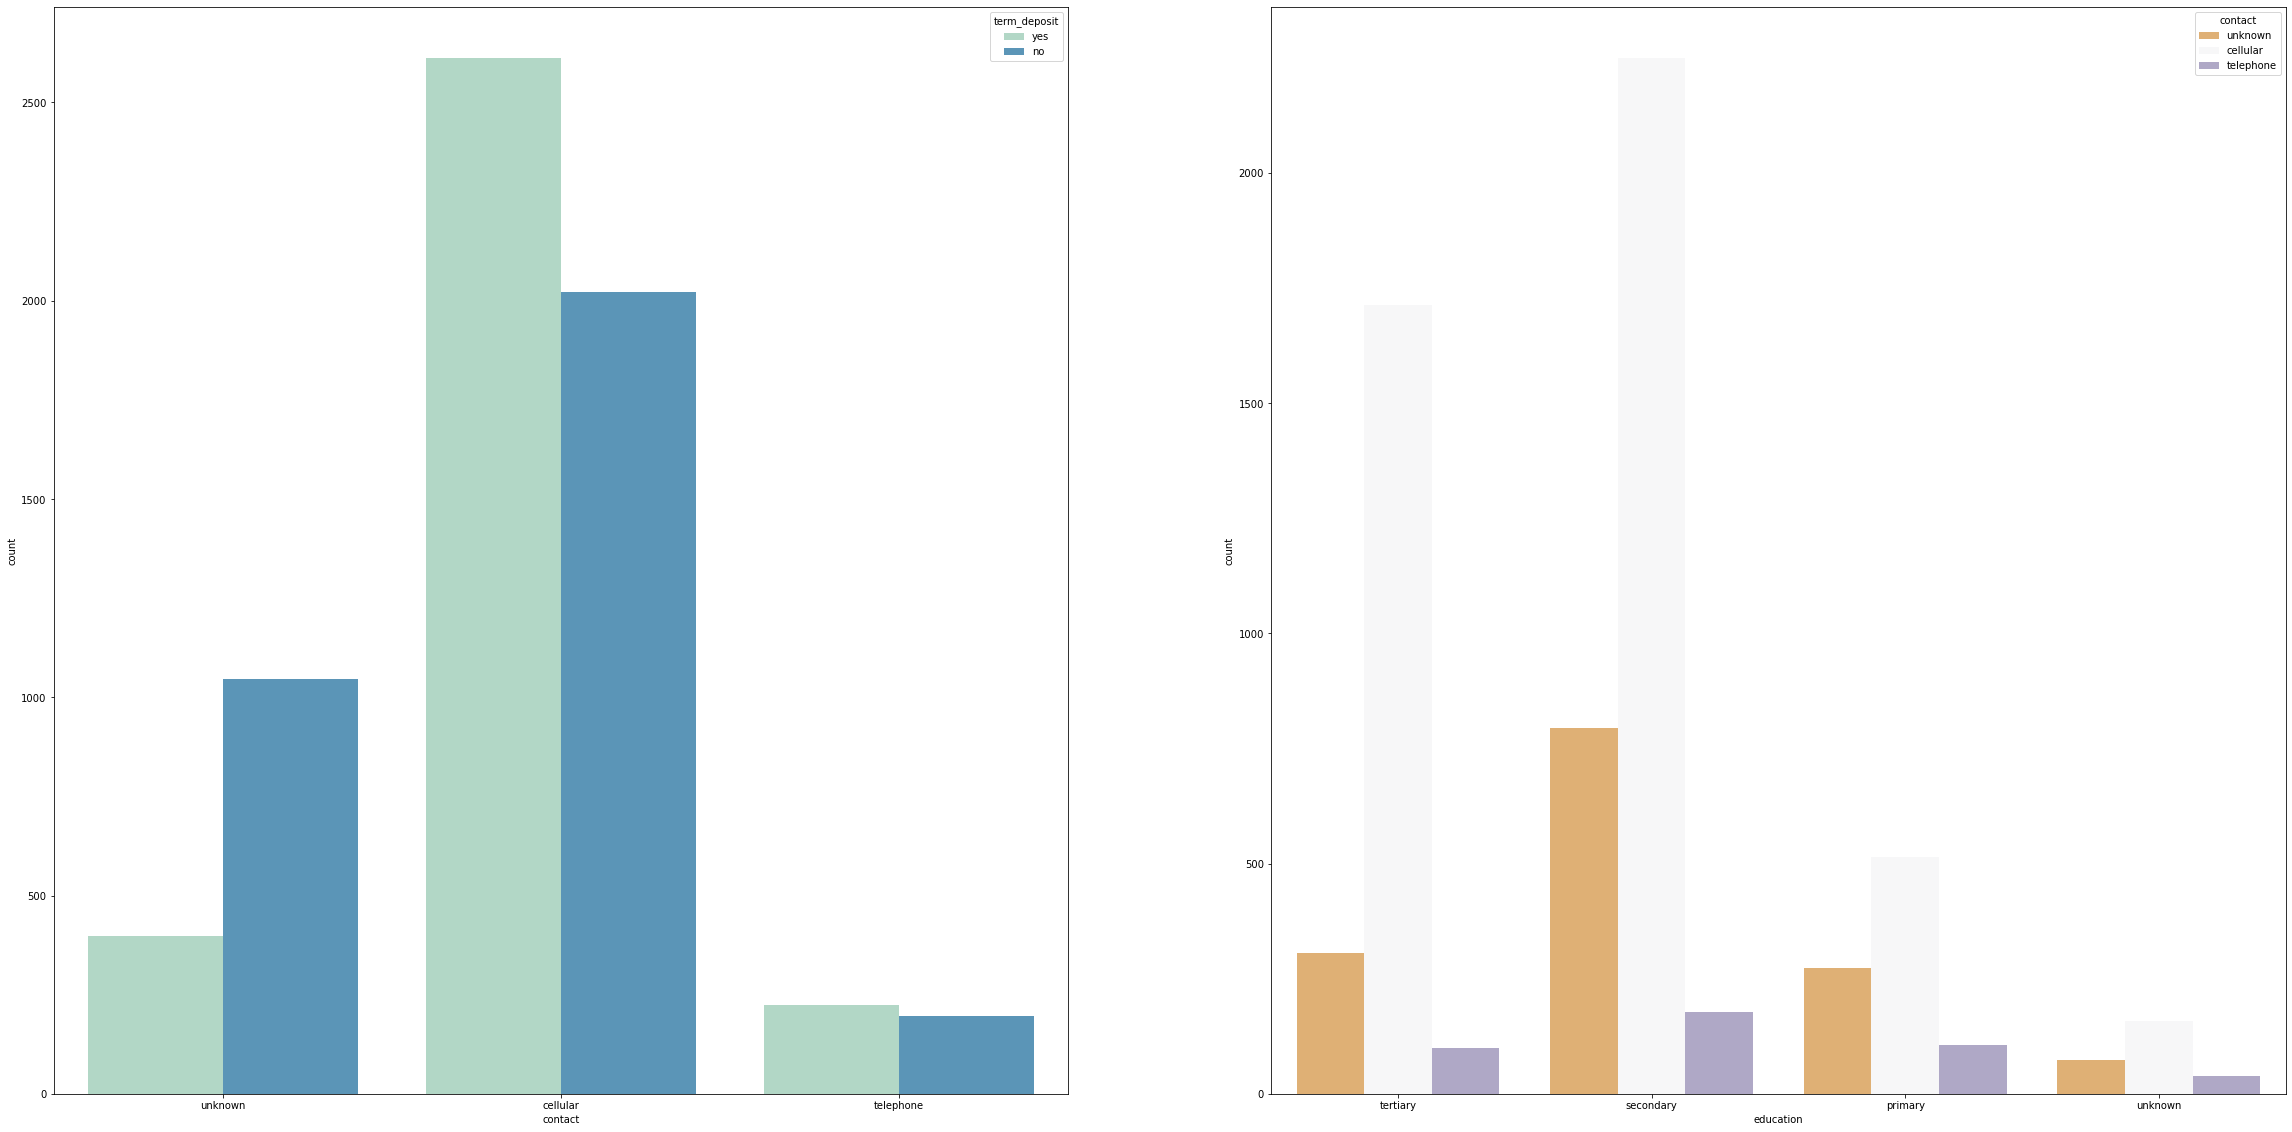

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols=2, figsize = (40,20))
sns.countplot(x='contact' ,hue='term_deposit', data = treino, ax=ax1, palette='YlGnBu', alpha = 0.8)
sns.countplot(x='education' ,hue='contact', data = treino, ax=ax2, palette='PuOr', alpha = 0.8)
#sns.countplot(x='previous' ,hue='term_deposit', data = treino, ax=ax3, palette='YlGnBu', alpha = 0.8)
#sns.countplot(x='poutcome' ,hue='term_deposit', data = treino, ax=ax4, palette='PuOr', alpha = 0.8)

#fig.savefig('ageComparação.pdf')

#sns.countplot(x = treino.loc[treino.month == 'may'].month, hue = treino['day'], palette = 'PuOr', ax=ax2, alpha=0.8)

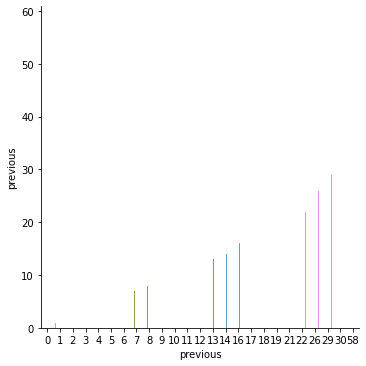

In [ ]:
sns.catplot(data=treino, kind="bar", x="previous", y="previous", hue="previous")


In [ ]:
x=treino[treino['previous'] > 0]['previous']
hue =treino[treino['previous'] > 0]['term_deposit']
#sns.countplot(x=x ,hue=hue, palette='PuOr', alpha = 0.8)
#sns.countplot(x='age' ,hue='term_deposit', data = treino, palette='PuOr', alpha = 0.8)
treino.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,0,46,management,divorced,tertiary,no,14481,yes,no,unknown,30,may,1,-1,0,unknown,yes
1,1,37,management,single,tertiary,no,457,yes,no,cellular,1,apr,3,-1,0,unknown,no
2,2,34,blue-collar,single,secondary,no,1698,yes,no,unknown,27,may,7,-1,0,unknown,no
3,3,45,unemployed,single,secondary,no,33,no,no,cellular,5,feb,1,-1,0,unknown,no
4,4,31,management,married,tertiary,no,131,no,no,cellular,18,feb,2,-1,0,unknown,yes


In [ ]:
treino[(treino['pdays'] >= 0 ) & (treino['default'] == 'yes' )]['term_deposit'].value_counts()

yes    4
no     3
Name: term_deposit, dtype: int64

In [ ]:
treino['default'].value_counts()

no     6403
yes      97
Name: default, dtype: int64

In [ ]:
treino[treino['previous'] == 0]['previous'].count()

5231

In [ ]:
treino[treino['pdays'] == -1]['pdays'].count()

5231

In [ ]:
treino[(treino['pdays'] >= 300 ) & (treino['pdays'] < 30000 )]['pdays'].count()

319

count     452.000000
mean     -336.955752
std       392.830637
min     -3372.000000
25%      -432.000000
50%      -241.500000
75%       -94.750000
max        -1.000000
Name: balance, dtype: float64

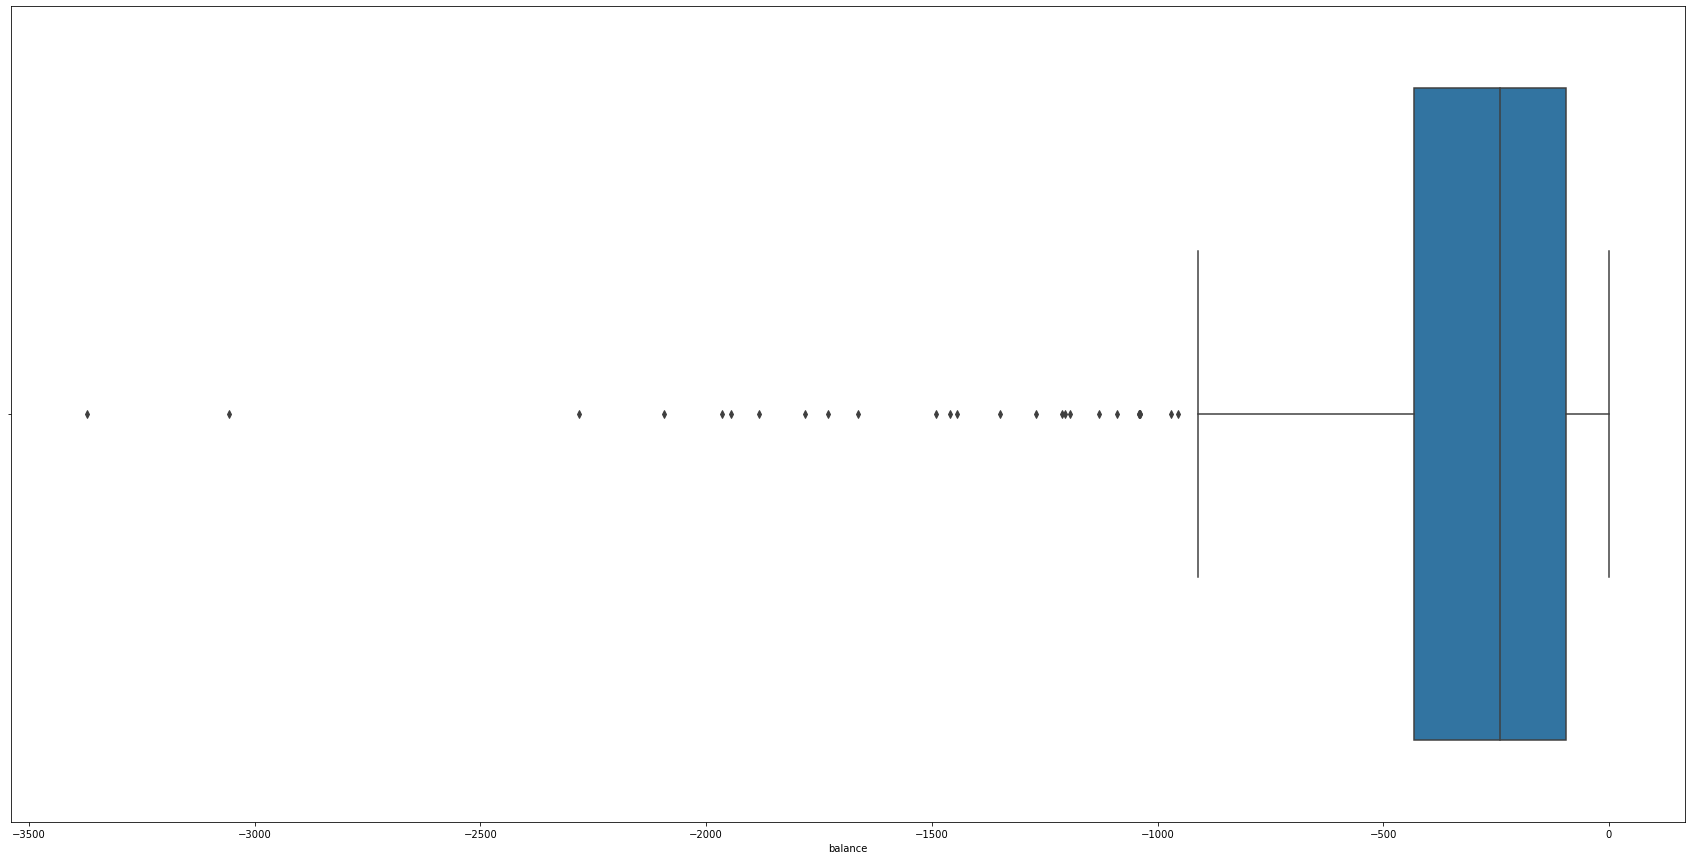

In [ ]:
fig, ax1= plt.subplots(nrows= 1, ncols=1, figsize = (30,15))

x=treino[(treino['balance'] >= -10000) & (treino['balance'] <  0)]['balance']

sns.boxplot(x=x,ax=ax1)

treino[(treino['balance'] >= -10000) & (treino['balance'] <  0)]['balance'].describe()

In [ ]:
'''import plotly.express as px

fig = px.box(treino, x="job", y="pdays", color="term_deposit")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()'''



'import plotly.express as px\n\nfig = px.box(treino, x="job", y="pdays", color="term_deposit")\n#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default\nfig.show()'

In [ ]:
#sns.displot(
 #   treino, x="age", col="term_deposit", row="marital", facet_kws=dict(margin_titles=True),
#)#.savefig('agexCampanin.pdf')


Conclusões

Por uma análise mais aprofundada, é possivel verificar a redundancia de dados entre 'pdays' (-1) e 'pcoutme' 'unknow', sendo nescessária a remoção dessa ambiguidade para teste de performance

In [ ]:
treino[(treino['contact'] == 'unknown' ) & (treino['poutcome'] == 'unknown' )]['term_deposit'].value_counts()

no     1044
yes     397
Name: term_deposit, dtype: int64

Copiando o Data set para manter o original



In [ ]:
data_treino = treino
data_teste = teste

print(data_treino.shape)
print(data_teste.shape)

(6500, 17)
(1422, 16)


Mapeando as Váriáveis categóricas bivariadas (possuem duas classes)

In [ ]:
data_treino_map = data_treino.copy()
data_treino_map['default'] = data_treino_map['default'].map({'yes': 1, 'no':0})
data_treino_map['housing'] = data_treino_map['housing'].map({'yes': 1, 'no':0})
data_treino_map['loan'] = data_treino_map['loan'].map({'yes': 1, 'no':0})
data_treino_map['term_deposit'] = data_treino_map['term_deposit'].map({'yes': 1, 'no':0})
data_treino_map.shape

(6500, 17)

In [ ]:
#Aplicando o Mesmo para o Conjunto de Teste
data_teste_map = data_teste.copy()
data_teste_map['default'] = data_teste_map['default'].map({'yes': 1, 'no':0})
data_teste_map['housing'] = data_teste_map['housing'].map({'yes': 1, 'no':0})
data_teste_map['loan'] = data_teste_map['loan'].map({'yes': 1, 'no':0})
data_teste_map.shape

(1422, 16)

Verificando a correlação entre as váriaveis dentro do dataset na parte somente de trinamento, que possui a vaiavel target definida

Mostra correlação forte com a variável resposta:

*   Housing
*   Campaingn
*   Loan
*   Balance
*   previous



In [ ]:
data_treino_map.corr()

,Unnamed: 0,age,default,balance,housing,loan,day,campaign,pdays,previous,term_deposit
Unnamed: 0,1.000000,-0.007698,0.024331,-0.005262,0.000405,-0.014089,-0.012264,0.017670,0.010465,0.019903,-0.005780
age,-0.007698,1.000000,-0.028868,0.103223,-0.190134,-0.020363,-0.011285,-0.017425,-0.029025,-0.026395,0.018511
default,0.024331,-0.028868,1.000000,-0.058626,0.011306,0.066354,0.018650,0.030005,-0.023302,-0.020528,-0.031079
balance,-0.005262,0.103223,-0.058626,1.000000,-0.070938,-0.080525,0.012602,-0.013405,0.019080,0.030579,0.069766
housing,0.000405,-0.190134,0.011306,-0.070938,1.000000,0.064868,-0.001361,0.005816,0.164108,0.062683,-0.161844
loan,-0.014089,-0.020363,0.066354,-0.080525,0.064868,1.000000,0.017598,0.004238,-0.005693,0.000721,-0.093758
day,-0.012264,-0.011285,0.018650,0.012602,-0.001361,0.017598,1.000000,0.136593,-0.092078,-0.063649,-0.045515
campaign,0.017670,-0.017425,0.030005,-0.013405,0.005816,0.004238,0.136593,1.000000,-0.080613,-0.039137,-0.119816
pdays,0.010465,-0.029025,-0.023302,0.019080,0.164108,-0.005693,-0.092078,-0.080613,1.000000,0.530580,0.068136
previous,0.019903,-0.026395,-0.020528,0.030579,0.062683,0.000721,-0.063649,-0.039137,0.530580,1.000000,0.080222


Forte Correlação:
* job e age
* marital e age
* previus e pdays pcoutme
* day e month



In [ ]:
#eda2 = sweetviz.compare_intra(data_map.loc[:tamanho_treino-1,:], data_map.loc[:tamanho_treino-1,:]['term_deposit'] == 0, ['Não', 'Sim'])
#eda2.show_html()
#IPython.display.HTML(filename='/content/SWEETVIZ_REPORT.html')

Escluindo colunas Unnamed do treino e do teste

In [ ]:
data_treino_drop = data_treino_map.copy()
data_treino_drop.drop(['Unnamed: 0'], axis=1, inplace=True)#, 'default'
data_treino_drop.shape

(6500, 16)

In [ ]:
#Mesmo para o teste
data_teste_drop = data_teste_map.copy()
data_teste_drop.drop(['Unnamed: 0'], axis=1, inplace=True)#, 'default'
data_teste_drop.shape

(1422, 15)

#Tratando Outliers

Todo tratamento é feito apenas no conjunto de TREINO, o conjunto de teste, que é a submissão do desafio não deve ter interferência nesta parte da engenharia de variáveis

In [ ]:
#data_treino_drop = data_teste_drop

Text(0.5, 1.0, 'previous')

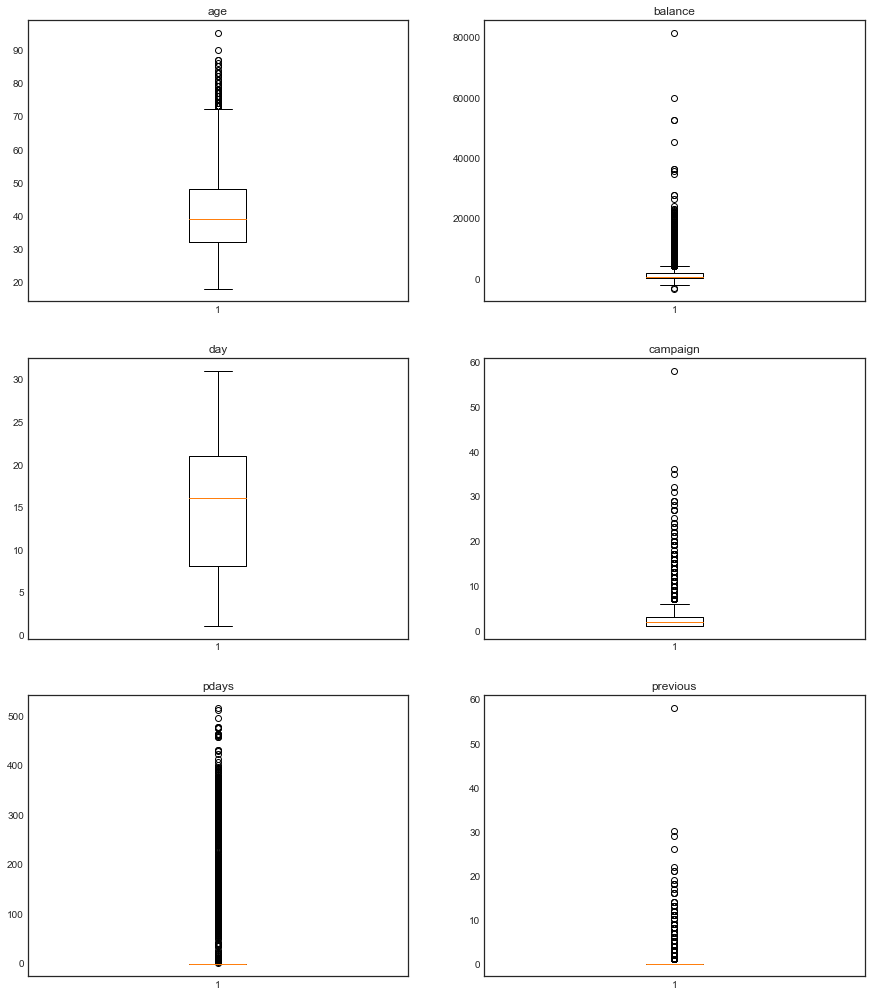

In [ ]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(data_treino_drop['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(data_treino_drop['balance'])
ax.set_title('balance')
ax=plt.subplot(523)
plt.boxplot(data_treino_drop['day'])
ax.set_title('day')
ax=plt.subplot(524)
plt.boxplot(data_treino_drop['campaign'])
ax.set_title('campaign')
ax=plt.subplot(525)
plt.boxplot(data_treino_drop['pdays'])
ax.set_title('pdays')
ax=plt.subplot(526)
plt.boxplot(data_treino_drop['previous'])
ax.set_title('previous')

Precisamos retirar alguns outliers para criar um padrão melhor para o conjunto de treinamento

In [ ]:
data_treino_drop.shape

(6500, 16)

In [ ]:
#Nós podemos concluir que as váriaveis Age, balance, Campanha, Pdays e Previus possuiem muitas outliers
#A váriavel Pdays apresenta maior discrepancia entre os dados
#Aplicando o Método IQR para tratamento de Outliers

numerical_features=['age', 'balance', 'campaign']#'pdays',  'previous'
for cols in numerical_features:
    Q1 = data_treino_drop[cols].quantile(0.25)
    Q3 = data_treino_drop[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (data_treino_drop[cols] >= Q1 - 1.5 * IQR) & (data_treino_drop[cols] <= Q3 + 1.5 *IQR)
    data_treino_out=data_treino_drop.loc[filter]

In [ ]:
data_treino_out.shape

(6124, 16)

Text(0.5, 1.0, 'previous')

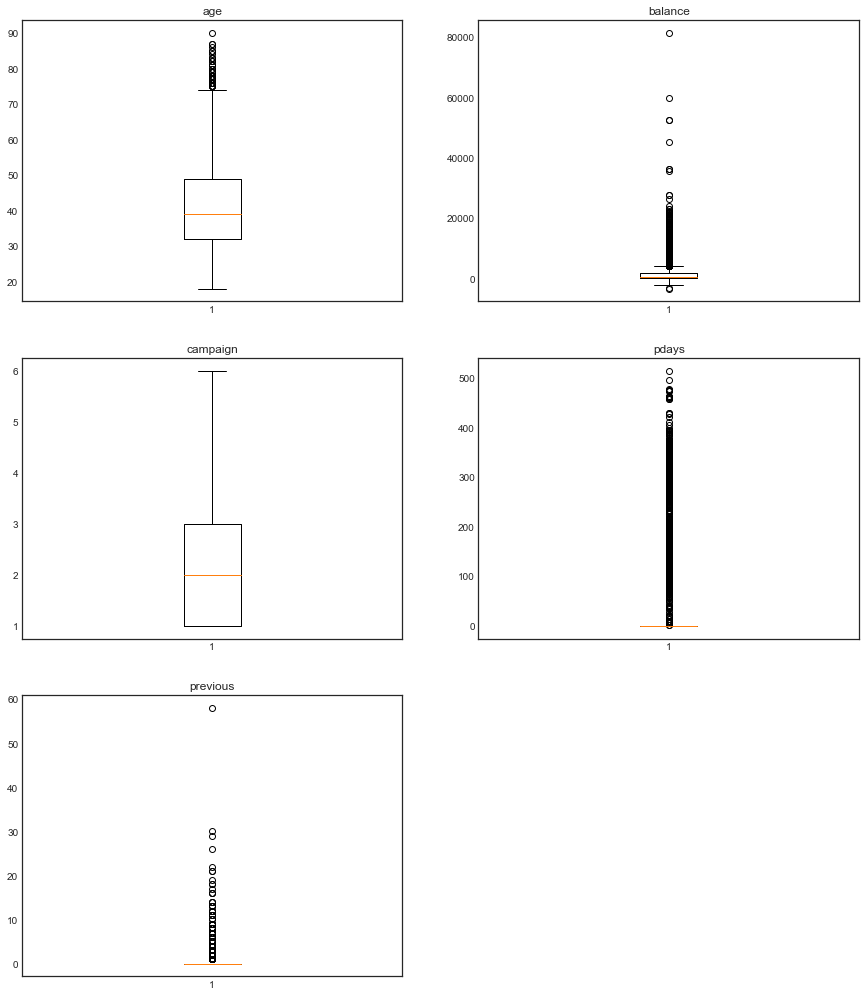

In [ ]:
#Verificando o resultado
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(data_treino_out['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(data_treino_out['balance'])
ax.set_title('balance')
ax=plt.subplot(523)
plt.boxplot(data_treino_out['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(data_treino_out['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(data_treino_out['previous'])
ax.set_title('previous')

Agrupando valores semelhantes e Categorizando


In [ ]:
#treino[(treino['balance'] >= 1) & (treino['balance'] <  100)]['term_deposit'].value_counts()
treino['day'].count()

6500

In [ ]:
#Categorizando o Balance
def balance_group(x):
  if x < 0:
    return -3000
  elif (x >= 4000):
    return 4000
  else:
    return x

#####################Categorizando o Balance
def balance_group2(x):
  if (x >= 1) and (x <= 100):
    return '1_100'
  elif (x >= 101) and (x <= 200):
    return '101_200'
  elif (x >= 201) and (x <= 300):
    return '201_300'
  elif (x >= 301) and (x <= 500):
    return '301_500'
  elif (x >= 501) and (x <= 700):
    return '501_700'
  elif (x >= 701) and (x <= 1000):
    return '701_1000'
  elif (x >= 1001) and (x <= 1500):
    return '1001_1500'
  elif (x >= 1501) and (x <= 2500):
    return '1501_2500'
  elif (x >= 2501) and (x <= 4000):
    return '2501_4000'
  elif x == 0:
    return 'Zero'
  elif (x >= -500) and (x <= -1):
    return '-500_-1'
  elif (x >= -1000) and (x <= -501):
    return '-1000_-500'
  elif x < -1001:
    return 'Negativo+'
  else:
    return '4000+'


#Definindo faixas de idade
def age_group(x):
  if (x >= 18) and (x <= 28):
    return '18_28'
  #elif x == 35:
    #return 'Sim'
  elif x >=59:
    return '59+'
  else:
    return '19_58'

####################Definindo faixas de idade
def age_group5(x):
  if (x >= 18) and (x < 28):
    return '18_27'
  elif (x >= 28) and (x < 38):
    return '28_37'
  elif (x >= 38) and (x < 48):
    return '28_47+'
  elif (x >= 48) and (x < 58):
    return '48_58'
  elif (x >= 58) and (x < 63):
    return '58_63'
  elif (x >= 63) and (x < 68):
    return '63_68'
  else:
    return '68+'

####################Definindo faixas de idade
def age_group4(x):
  if (x >= 18) and (x < 28):
    return '18_27'
  elif (x >= 28) and (x < 38):
    return '28_37'
  elif (x >= 38) and (x < 48):
    return '28_47+'
  elif (x >= 48) and (x < 58):
    return '48_58'
  elif (x >= 58) and (x < 63):
    return '58_63'
  else:
    return '63+'

####################Definindo faixas de idade
def age_group3(x):
  if (x >= 18) and (x < 23):
    return '18_23'
  elif (x >= 23) and (x < 28):
    return '23_28'
  elif (x >= 28) and (x < 33):
    return '28_33'
  elif (x >= 33) and (x < 38):
    return '33_38'
  elif (x >= 38) and (x < 43):
    return '38_43'
  elif (x >= 43) and (x < 48):
    return '43_48'
  elif (x >= 48) and (x < 53):
    return '48_53'
  elif (x >= 53) and (x < 58):
    return '53_58'
  else:
    return '58+'


####################Definindo faixas de idade
def age_group2(x):
  if (x >= 18) and (x < 28):
    return '18_27'
  elif (x >= 28) and (x < 38):
    return '28_37'
  elif (x >= 38) and (x < 48):
    return '28_47+'
  elif (x >= 48) and (x < 58):
    return '48_58'
  else:
    return '58+'


#agrupando os Day
def day_group2(a):
  if (a >= 1) and (a <= 5):
    return 'começo'
  elif (a >= 10) and (a <= 15):
    return 'meio'
  elif a == 22:
    return 'fim'
  elif a == 24:
    return 'fim'
  elif a== 25:
    return 'fim'
  elif a == 27:
    return 'fim'
  else:
    return "fim"

#agrupando os Day
def day_group(a):
  if (a >= 1) and (a <= 5):
    return 'day_s'
  elif (a >= 10) and (a <= 15):
    return 'day_s'
  elif a == 22:
    return 'day_s'
  elif a == 24:
    return 'day_s'
  elif a== 25:
    return 'day_s'
  elif a == 27:
    return 'day_s'
  else:
    return "day_n"

#Agrupando os Meses Dezembro, Março, Outubro, Setembro
def month_group(x):
  if x == 'dec':
    return 'De_Ma_Ou_Se'
  elif x == 'mar':
    return 'De_Ma_Ou_Se'
  elif x == 'sep':
    return 'De_Ma_Ou_Se'
  elif x == 'oct':
    return 'De_Ma_Ou_Se'
  else:
    return x

#Agrupando os Job
def job_group(x):
  if x == 'entrepreneur':
    return 'Entr_Unem'
  elif x== 'unemployed':
    return 'Entr_Unem'
  elif x== 'admin.':
    return 'Adm_self'
  elif x== 'self-employed':
    return 'Adm_self'
  else:
    return x

#faixas de intervalo para agrupar campaign
def campaign_group(x):
  if x == 1:
    return 1
  elif x==2:
    return 2
  elif x==3:
    return 3
  elif x==4:
    return 4
  else:
    return 5

#agrupando os previus
def previous_group(x):
  if x ==0:
    return 'Sem_contato'
  else:
    return "Contactado"

############agrupando os previus
def previous_group2(x):
  if x < 8:
    return x
  else:
    return '8+'

#Agrupando Pday em > 0 Contato
def pdays_group(x):
  if x == -1:
    return -100
  else:
    return x

  #Agrupando Pday em > 0 Contato
def pdays_group2(x):
  if x == -1:
    return -1
  elif (x >= 1) and (x < 100):
    return 100
  elif (x >= 100) and (x < 200):
    return 200
  elif (x >= 200) and (x < 300):
    return 300
  else:
    return 400

###########################################################################################
#Agrupando os Meses Dezembro, Março, Outubro, Setembro
def month_group2(x):
  if x == 'jan':
    return 1
  elif x == 'feb':
    return 2
  elif x == 'mar':
    return 3
  elif x == 'apr':
    return 4
  elif x == 'may':
    return 5
  elif x == 'jun':
    return 6
  elif x == 'jul':
    return 7
  elif x == 'aug':
    return 8
  elif x == 'sep':
    return 9
  elif x == 'oct':
    return 10
  elif x == 'nov':
    return 11
  elif x == 'dec':
    return 12
  else:
    return '20'
 


In [ ]:
data_treino_out.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,46,management,divorced,tertiary,0,14481,1,0,unknown,30,may,1,-1,0,unknown,1
1,37,management,single,tertiary,0,457,1,0,cellular,1,apr,3,-1,0,unknown,0
3,45,unemployed,single,secondary,0,33,0,0,cellular,5,feb,1,-1,0,unknown,0
4,31,management,married,tertiary,0,131,0,0,cellular,18,feb,2,-1,0,unknown,1
5,35,management,married,tertiary,0,646,1,0,cellular,18,nov,2,-1,0,unknown,0
6,35,blue-collar,married,secondary,0,74,0,0,cellular,23,jul,2,-1,0,unknown,0
8,22,blue-collar,single,secondary,0,682,0,0,cellular,5,jun,2,91,1,success,1
9,33,management,married,tertiary,0,271,1,0,cellular,14,aug,2,-1,0,unknown,1
11,27,services,single,secondary,0,1347,0,0,telephone,28,dec,1,193,11,success,1
12,34,management,single,tertiary,0,-578,1,0,cellular,18,may,2,-1,0,unknown,1


In [ ]:
data_treino_num = data_treino_out.copy()

data_treino_num['month'] = data_treino_num['month'].apply(month_group2)
data_treino_num['pdays'] = data_treino_num['pdays'].apply(pdays_group)


data_treino_job = data_treino_num['job'].value_counts().to_dict()
data_treino_edu = data_treino_num['education'].value_counts().to_dict()
data_treino_mar = data_treino_num['marital'].value_counts().to_dict()



data_treino_num['job']=data_treino_num['job'].map(data_treino_job)
data_treino_num['education']=data_treino_num['education'].map(data_treino_edu)
#data_treino_num['marital']=data_treino_num['marital'].map(data_treino_mar)

data_treino_num.loc[:,['job','education','marital']].head()

,job,education,marital
0,1377,2000,divorced
1,1377,2000,single
3,210,3021,single
4,1377,2000,married
5,1377,2000,married


In [ ]:
#Mesma tranformação para o conjunto de teste
data_teste_num = data_teste_drop
data_teste_num['month'] = data_teste_num['month'].apply(month_group2)
data_teste_num['pdays'] = data_teste_num['pdays'].apply(pdays_group)

data_teste_num['job']=data_teste_num['job'].map(data_treino_job)
data_teste_num['education']=data_teste_num['education'].map(data_treino_edu)
#data_teste_num['marital']=data_teste_num['marital'].map(data_treino_mar)


data_teste_num.shape

(1422, 15)

In [ ]:
data_treino_num.groupby(['pdays'])['term_deposit'].value_counts()

pdays  term_deposit
-100   0               2575
       1               2308
 1     0                  1
 2     0                  1
 5     0                  1
                       ... 
 475   1                  1
 476   1                  1
 477   1                  1
 495   1                  1
 515   1                  1
Name: term_deposit, Length: 478, dtype: int64

In [ ]:

estado_civil=data_treino_num.groupby(['marital'])['term_deposit'].mean().sort_values().index
estado_civil

estado_civil2={k:i for i,k in enumerate(estado_civil,0)}
estado_civil2

data_treino_num['Estado_Civil']=data_treino_num['marital'].map(estado_civil2)
data_treino_num.drop(['marital'], axis=1,inplace=True)

data_treino_num.Estado_Civil.value_counts()



0    3464
2    1923
1     737
Name: Estado_Civil, dtype: int64

In [ ]:

#MEsmo para o Teste
data_teste_num['Estado_Civil']=data_teste_num['marital'].map(estado_civil2)
data_teste_num.drop(['marital'], axis=1,inplace=True)

data_teste_num.Estado_Civil.value_counts()


0    815
2    432
1    175
Name: Estado_Civil, dtype: int64

Dummificando as colunas

In [ ]:
data_treino_num.shape

(6124, 16)

In [ ]:
data_treino_num.head(1)

,age,job,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit,Estado_Civil
0,46,1377,2000,0,14481,1,0,unknown,30,5,1,-100,0,unknown,1,1


In [ ]:
data_treino_dum = data_treino_num.copy()
data_treino_dum = pd.get_dummies(data_treino_dum, 
                                 columns = ['contact',  'poutcome' ])

data_treino_dum.shape

(6124, 21)

In [ ]:
#Mesmo para o conjunto de Teste
data_teste_dum = data_teste_num.copy()
data_teste_dum = pd.get_dummies(data_teste_dum, 
                                 columns = ['contact',  'poutcome' ])
data_teste_dum.shape

(1422, 20)

#Normalizando as faixas de valores altas

Aqui temos um data liquid controlado, pois apesar de aplicar as padrozinações no conjunto de teste apartir do conjunto de treino, é uma situação controlada, pois não esperamos dados muito fora dessa faixa

In [ ]:
data_treino_dum.head(1)

,age,job,education,default,balance,housing,loan,day,month,campaign,...,previous,term_deposit,Estado_Civil,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,46,1377,2000,0,14481,1,0,30,5,1,...,0,1,1,0,0,1,0,0,0,1


In [ ]:
sc = StandardScaler()

data_treino_norm = data_treino_dum.copy().reset_index(drop=True)

aux0 = sc.fit_transform(data_treino_norm[['age', 'job', 'education', 'balance', 'pdays', 'previous']])#faz o ajuste, calculo da média e do desvio padrão. (- a mpedia) / desvio padrão
aux1 = pd.DataFrame(aux0, columns = ['idade', 'Cargo', 'Educação', 'Saldo_conta', 'dias_Contato', 'Previo'])#transforma num data frame o numpy array e adicionado ao data frame
data_treino_norm = pd.concat([data_treino_norm, aux1], axis = 1)#concatena com o o conjunto de dados
data_treino_norm.drop(['age', 'job', 'education', 'balance', 'pdays', 'previous'], axis = 1, inplace = True) #dropa as colunas antigas do conjunto de dados
data_treino_norm

,default,housing,loan,day,month,campaign,term_deposit,Estado_Civil,contact_cellular,contact_telephone,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,idade,Cargo,Educação,Saldo_conta,dias_Contato,Previo
0,0,1,0,30,5,1,1,1,0,0,...,0,0,0,1,0.444481,1.199626,-0.314281,4.009700,-0.467776,-0.307291
1,0,1,0,1,4,3,0,2,1,0,...,0,0,0,1,-0.345650,1.199626,-0.314281,-0.340459,-0.467776,-0.307291
2,0,0,0,5,2,1,0,2,1,0,...,0,0,0,1,0.356688,-1.565588,0.865132,-0.471981,-0.467776,-0.307291
3,0,0,0,18,2,2,1,0,1,0,...,0,0,0,1,-0.872403,1.199626,-0.314281,-0.441582,-0.467776,-0.307291
4,0,1,0,18,11,2,0,0,1,0,...,0,0,0,1,-0.521234,1.199626,-0.314281,-0.281832,-0.467776,-0.307291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,0,1,0,2,7,1,1,2,1,0,...,0,0,1,0,-1.135780,1.199626,-0.314281,3.536654,3.363369,1.332903
6120,0,0,0,14,8,2,0,0,0,1,...,0,0,0,1,1.410195,-1.141447,0.865132,-0.333634,-0.467776,-0.307291
6121,0,0,0,20,6,6,0,0,0,0,...,0,0,0,1,-0.082273,-1.667477,0.865132,-0.401567,-0.467776,-0.307291
6122,0,0,0,3,6,1,1,1,1,0,...,0,0,0,1,1.146819,-0.404530,0.865132,-0.420178,-0.467776,-0.307291


In [ ]:
#Mesmo ao Conjunto de Teste
aux0 = sc.transform(data_teste_dum[['age', 'job', 'education', 'balance', 'pdays', 'previous']])#sem o fit, ele ja foi feito na etapa passada, sem vazamento de dados
aux1 = pd.DataFrame(aux0, columns = ['idade', 'Cargo', 'Educação', 'Saldo_conta', 'dias_Contato', 'Previo'])
data_teste_norm = pd.concat([data_teste_dum, aux1], axis = 1)
data_teste_norm.drop(['age', 'job', 'education', 'balance', 'pdays', 'previous'], axis = 1, inplace = True)
data_teste_norm.shape

(1422, 20)

Separando a variável Alvo(term_deposit) e ajustando para o treino e teste

In [ ]:
#data_treino_norm = data_treino_dum

#data_teste_norm = data_teste_dum

In [ ]:
#separa novamente o conjunto em treino e teste, depois de todas as modificações feitas
YTreino = data_treino_norm['term_deposit'].to_list()
XTreino = data_treino_norm.drop(['term_deposit'],axis=1)

XTeste = data_teste_norm.copy()

XTreino.describe()

,default,housing,loan,day,month,campaign,Estado_Civil,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,idade,Cargo,Educação,Saldo_conta,dias_Contato,Previo
count,6124.000000,6124.00000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6.124000e+03,6.124000e+03,6.124000e+03,6.124000e+03,6.124000e+03,6.124000e+03
mean,0.014696,0.50098,0.135206,15.422436,6.301274,2.067603,0.748367,0.718321,0.061398,0.220281,0.103854,0.038537,0.059928,0.797681,5.766794e-17,-2.955398e-16,2.405725e-16,1.404095e-17,1.038251e-16,-8.036608e-17
std,0.120344,0.50004,0.341971,8.305416,2.556727,1.283828,0.903586,0.449854,0.240078,0.414470,0.305096,0.192504,0.237373,0.401761,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.013703e+00,-1.977882e+00,-2.333492e+00,-1.528191e+00,-4.677760e-01,-3.072909e-01
25%,0.000000,0.00000,0.000000,8.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.846110e-01,-7.646951e-01,-3.142810e-01,-4.480959e-01,-4.677760e-01,-3.072909e-01
50%,0.000000,1.00000,0.000000,15.000000,6.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.700652e-01,2.518231e-01,-3.142810e-01,-3.136269e-01,-4.677760e-01,-3.072909e-01
75%,0.000000,1.00000,0.000000,21.000000,8.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.078573e-01,7.020293e-01,8.651322e-01,5.488345e-02,-4.677760e-01,-3.072909e-01
max,1.000000,1.00000,1.000000,31.000000,12.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.307340e+00,1.199626e+00,8.651322e-01,2.470677e+01,4.253976e+00,3.140313e+01


In [ ]:
print(XTreino.shape)
print(XTeste.shape)
len(YTreino)

(6124, 20)
(1422, 20)


6124

Finalmente começando a busca de modelos

Engenharia de Variáveis


(6124, 20)


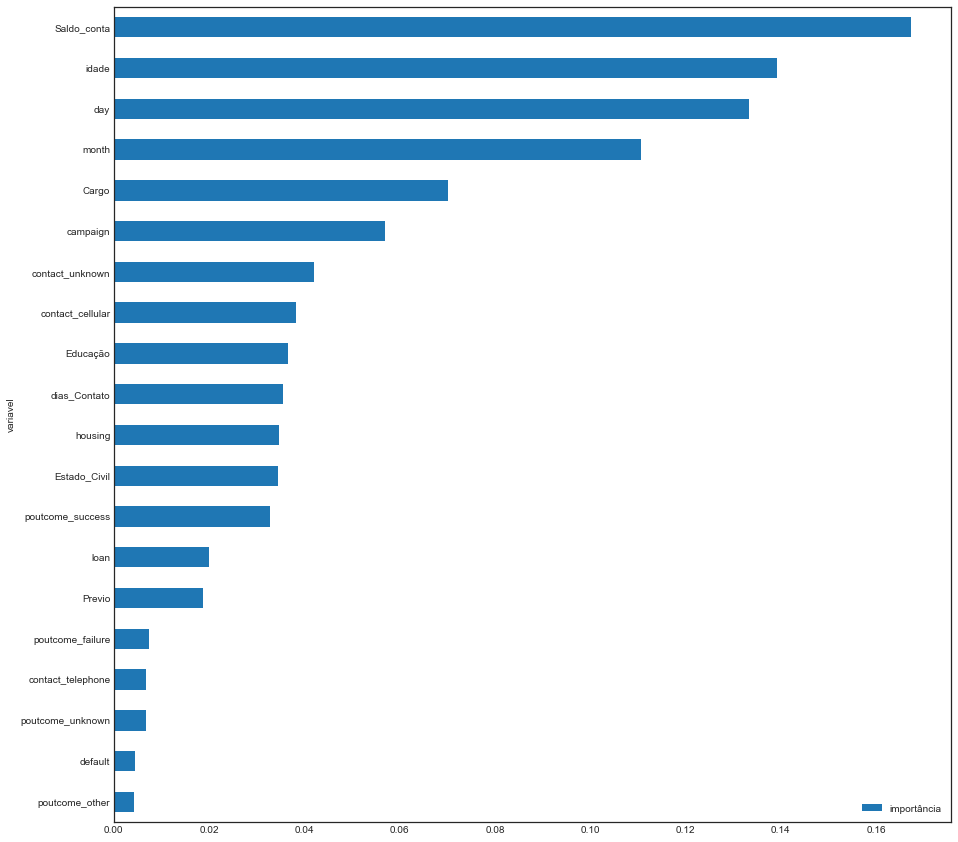

In [ ]:
modelo_base = RandomForestClassifier(min_samples_split = 10) 
modelo_base.fit(XTreino, YTreino) 
#Array que mostra a importância de cada variável usada para contruir o modelo
modelo_base.feature_importances_

variaveis = pd.DataFrame()#tranforma em um data frame para melhor visualização
variaveis['variavel'] = XTreino.columns#pega os nome das colunas
variaveis['importância'] = modelo_base.feature_importances_#atribui os valores
variaveis.sort_values(by = "importância", ascending = False)#organiza por ordem decrescente de importância

#Traz de forma grafica para melhor vizualisção
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(15, 15));

print(XTreino.shape)


In [ ]:
'''resultados2 = pd.DataFrame()
t = time()


for i in np.arange(1,XTreino.shape[1]+1,1):

  seletor = SelectFromModel(modelo_base, prefit = True, max_features = i, threshold = -np.inf)#modelo base, prefit , max_features = maximo de variáveis
  treino_reduzido = seletor.transform(XTreino)#filtra o conjunto de dados baseado no select
  teste_reduzido = seletor.transform(XTeste)#filtra o conjunto de dados para o teste

  modelo = RandomForestClassifier(max_depth = 9, min_samples_split = 20)
  validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
  
  mol_randon2 = cross_validate(modelo, treino_reduzido, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 10)
  
  acc2 = mol_randon2['test_accuracy'].mean()
  pre2 = mol_randon2['test_precision'].mean()
  rec2 = mol_randon2['test_recall'].mean()
  f1s2 = mol_randon2['test_f1'].mean()

  print('F1: ',  f1s2)
  print('Precisão: ',  pre2)
  print('Recall', rec2)
  print( 'Acurácia' ,acc2)

  print('\n   ', i, '\n\n\n\n')

  dic2 = {'Acurácia': [acc2], 'Precisão' : [pre2],  'Recall': [rec2], 'F1-Score': [f1s2]}
  aux2 = pd.DataFrame(dic2, index = [i])
  resultados2 = pd.concat([resultados2, aux2])

print('Tempo de Total Execução:', round((time() - t)/60, 2), 'minutos\n')'''

"resultados2 = pd.DataFrame()\nt = time()\n\n\nfor i in np.arange(1,XTreino.shape[1]+1,1):\n\n  seletor = SelectFromModel(modelo_base, prefit = True, max_features = i, threshold = -np.inf)#modelo base, prefit , max_features = maximo de variáveis\n  treino_reduzido = seletor.transform(XTreino)#filtra o conjunto de dados baseado no select\n  teste_reduzido = seletor.transform(XTeste)#filtra o conjunto de dados para o teste\n\n  modelo = RandomForestClassifier(max_depth = 9, min_samples_split = 20)\n  validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)\n  \n  mol_randon2 = cross_validate(modelo, treino_reduzido, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 10)\n  \n  acc2 = mol_randon2['test_accuracy'].mean()\n  pre2 = mol_randon2['test_precision'].mean()\n  rec2 = mol_randon2['test_recall'].mean()\n  f1s2 = mol_randon2['test_f1'].mean()\n\n  print('F1: ',  f1s2)\n  print('Precisão: ',  pre2)\n  print('Recall', rec2)\n  print( 'Acur

In [ ]:
#resultados2.sort_values('Recall', ascending=False)

In [ ]:
#XTreino['job'].value_counts()

#TESTE de Vários algorítimos básicos

In [ ]:
#Nomes dos classificadores considerados
nome = [
    '5-Vizinhos Mais Próximos',
    '45-Vizinhos Mais Próximos',
    '25-Vizinhos Mais Próximos',
    '65-Vizinhos Mais Próximos',
    'Árvore de Decisão',
    'Regressão Logística', 
    'Análise Discriminante Linear',
    'Análise Discriminante Quadrática',
    'Bagging de Árvores',
    'Bagging de Regressão Logística',
    'Floresta Aleatória',
    'AdaBoost',
    'Extra Árvores',
    'Classificador Passivo Agressivo',
    'Gradient Boosting',
    'Gaussian Naive Bayes', 
    'Support Vector Machine (Linear)',
    'Support Vector Machine (RBF)',
    'Support Vector Machine (Poli.G3)',
    'Support Vector Machine (Sigmoid)',
    'Rede Neural Perceptron',
    'Rede Neural MLP (10)',
    'Rede Neural MLP (10,10)',
    'Rede Neural MLP (100)']

#Classificadores considerados
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    KNeighborsClassifier(n_neighbors = 45),
    KNeighborsClassifier(n_neighbors = 25),
    KNeighborsClassifier(n_neighbors = 65),
    DecisionTreeClassifier(),
    LogisticRegression(), 
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    PassiveAggressiveClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(), 
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'poly'),
    SVC(kernel = 'sigmoid'),
    Perceptron(),
    MLPClassifier(hidden_layer_sizes=(10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(10,10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(100), max_iter = 1000)]

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
resultados = pd.DataFrame()

i = 1
t0 = time()
print(t0)

for i, modelo in enumerate(classifiers):
    print('Ajustando o modelo', nome[i])
    t = time()
    mol_testes = cross_validate(modelo, XTreino, YTreino, cv = validacao, 
                                scoring = ['accuracy', 'roc_auc','recall', 'f1', 'precision'],
                                verbose = 8, n_jobs = -1)
    print('Tempo de Execução:', round(time() - t, 2), 'segundos\n')
    acc = mol_testes['test_accuracy'].mean()
    auc = mol_testes['test_roc_auc'].mean()
    f1s = mol_testes['test_f1'].mean()
    pre = mol_testes['test_precision'].mean()
    rec = mol_testes['test_recall'].mean()


    dic = {'F1-Score': [f1s], 'Precisão': [pre], 'Recall': [rec], 'Acurácia': [acc], 'Área ROC': [auc]}
    aux = pd.DataFrame(dic, index = [nome[i]])
    resultados = pd.concat([resultados, aux])

print('Tempo de Total Execução:', round(time() - t0, 2), 'segundos\n')

1619841278.5486822
Ajustando o modelo 5-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 16.79 segundos

Ajustando o modelo 45-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 14.57 segundos

Ajustando o modelo 25-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 12.98 segundos

Ajustando o modelo 65-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 16.28 segundos

Ajustando o modelo Árvore de Decisão


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 3.27 segundos

Ajustando o modelo Regressão Logística


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 7.62 segundos

Ajustando o modelo Análise Discriminante Linear


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 2.41 segundos

Ajustando o modelo Análise Discriminante Quadrática


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 2.44 segundos

Ajustando o modelo Bagging de Árvores


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 14.28 segundos

Ajustando o modelo Bagging de Regressão Logística


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   55.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 56.02 segundos

Ajustando o modelo Floresta Aleatória


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 42.91 segundos

Ajustando o modelo AdaBoost


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 17.08 segundos

Ajustando o modelo Extra Árvores


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 43.23 segundos

Ajustando o modelo Classificador Passivo Agressivo


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 1.67 segundos

Ajustando o modelo Gradient Boosting


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 38.03 segundos

Ajustando o modelo Gaussian Naive Bayes


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 1.34 segundos

Ajustando o modelo Support Vector Machine (Linear)


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 697.7 segundos

Ajustando o modelo Support Vector Machine (RBF)


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 85.86 segundos

Ajustando o modelo Support Vector Machine (Poli.G3)


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 84.97 segundos

Ajustando o modelo Support Vector Machine (Sigmoid)


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 54.02 segundos

Ajustando o modelo Rede Neural Perceptron


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 1.54 segundos

Ajustando o modelo Rede Neural MLP (10)


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 180.63 segundos

Ajustando o modelo Rede Neural MLP (10,10)


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Tempo de Execução: 307.4 segundos

Ajustando o modelo Rede Neural MLP (100)


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.3min


Tempo de Execução: 691.1 segundos

Tempo de Total Execução: 2394.3 segundos



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.5min finished


In [ ]:
resultados = resultados.sort_values('F1-Score', ascending=False)
resultados.head(40)

,F1-Score,Precisão,Recall,Acurácia,Área ROC
Gradient Boosting,0.684579,0.720020,0.653151,0.694871,0.762104
Floresta Aleatória,0.677525,0.706272,0.651511,0.685401,0.746850
Support Vector Machine (Linear),0.674334,0.596363,0.776929,0.619105,0.696318
Support Vector Machine (RBF),0.672735,0.641597,0.707657,0.650686,0.713110
Support Vector Machine (Poli.G3),0.668078,0.611794,0.736519,0.628644,0.691066
AdaBoost,0.667722,0.690564,0.646808,0.673563,0.738187
Análise Discriminante Linear,0.665493,0.643893,0.689162,0.648562,0.701918
Extra Árvores,0.664643,0.685084,0.645885,0.669416,0.723035
Bagging de Regressão Logística,0.663342,0.646178,0.681952,0.648957,0.701004
Regressão Logística,0.662912,0.646794,0.680534,0.648957,0.701498


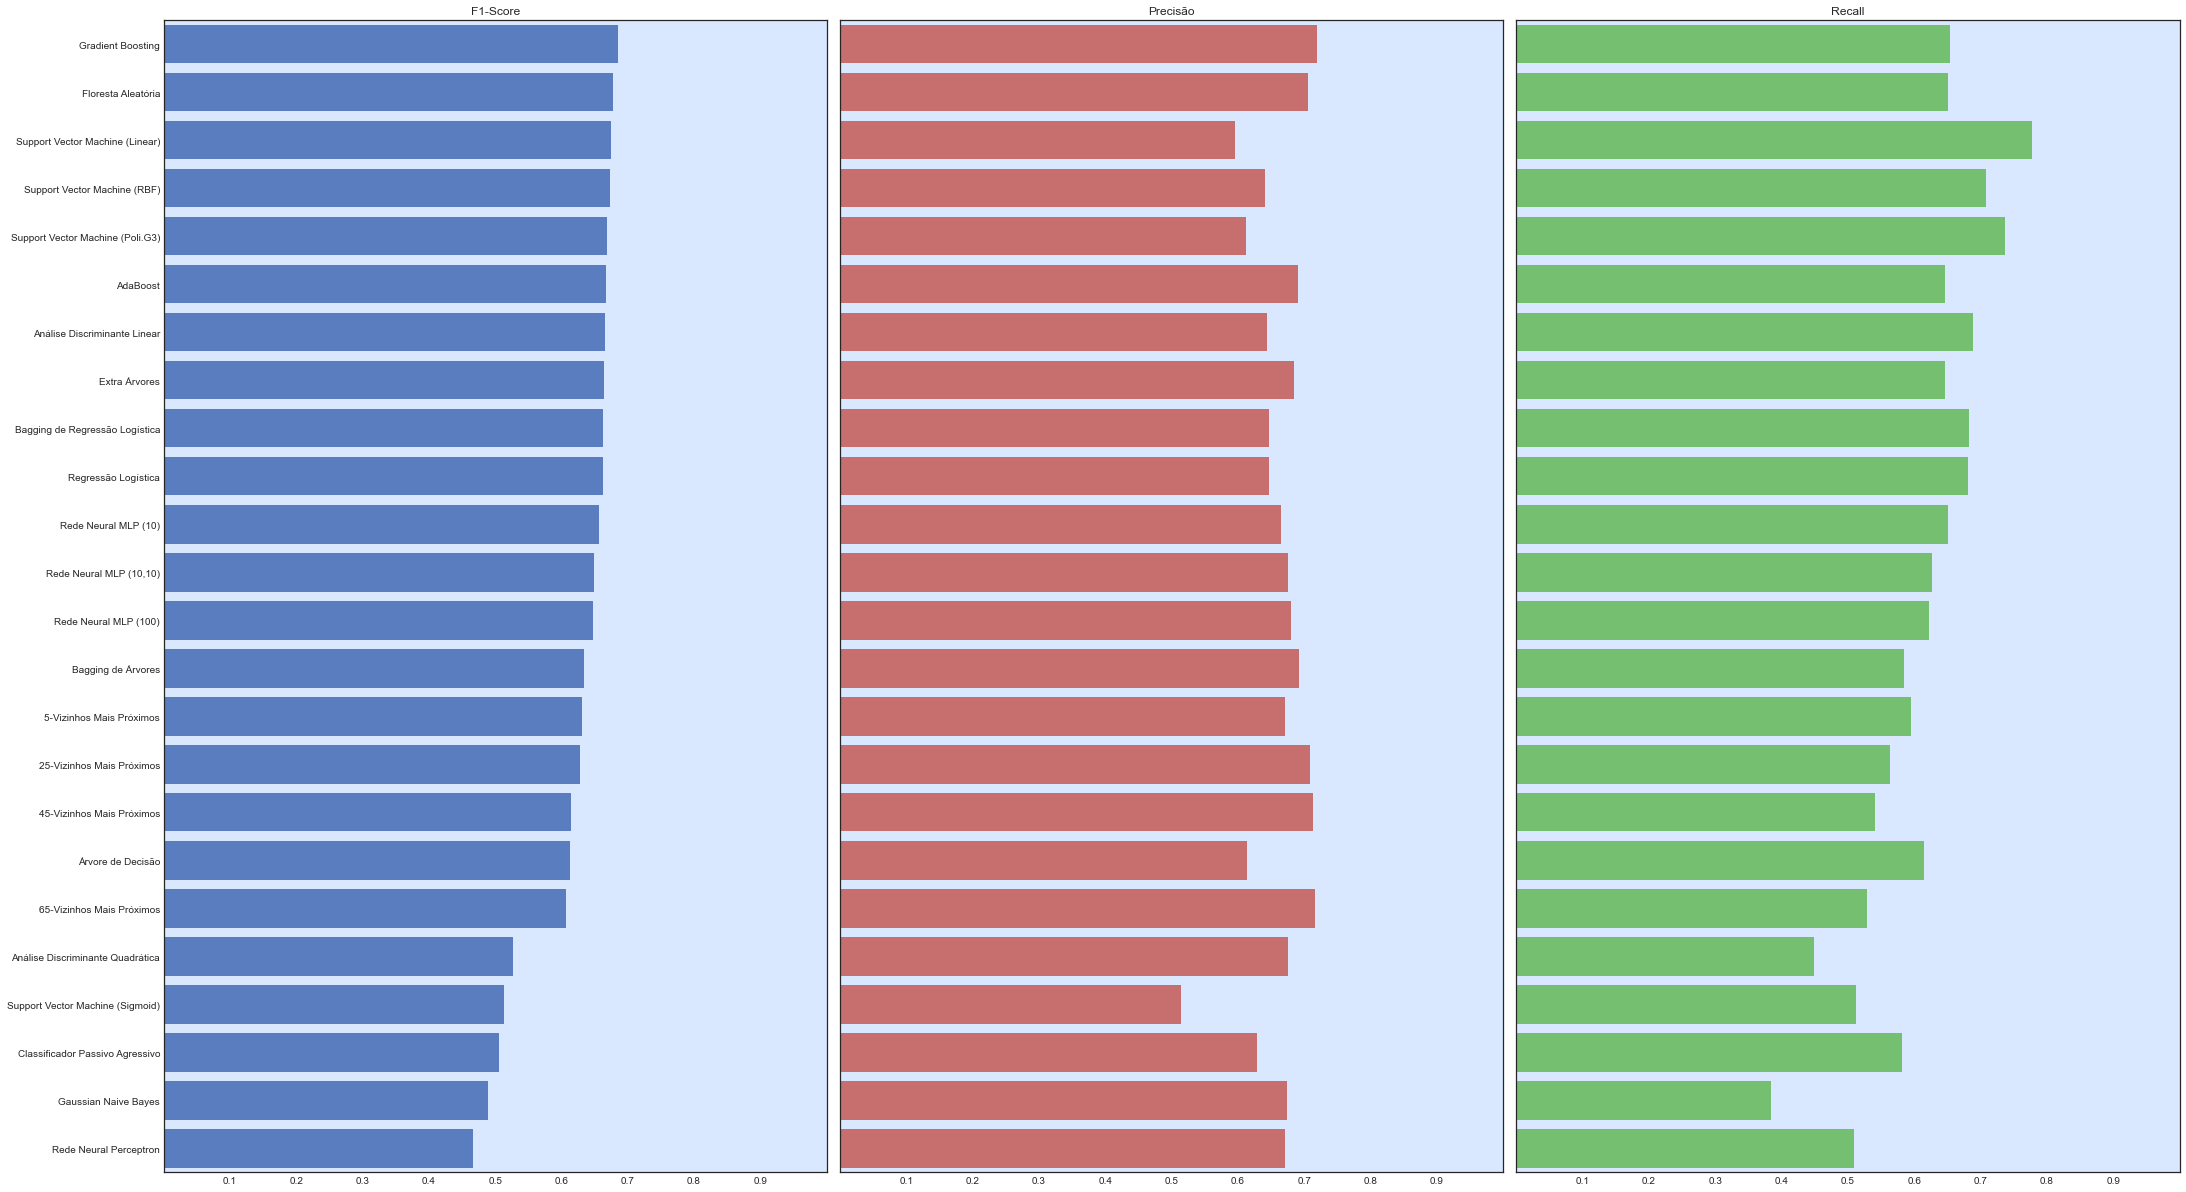

In [ ]:
#Gráficos relevantes
sns.set_color_codes("muted")
bgcolor = '#d9e7ff'
ticagem = [.1, .2, .3, .4, 0.5, .6,.7,.8,.9]
figura = plt.figure(figsize=(40,20)) 
figura.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.02, hspace=1)

plt.subplot(1, 3, 1)
plt.title('F1-Score')
acc = sns.barplot(x = resultados.iloc[:,0], y = resultados.index.values, color='b')
acc.axes.set_xlim([0, 1])
acc.xaxis.set_ticks(ticagem)
acc.set_facecolor(bgcolor)
plt.xlabel('')

plt.subplot(1, 3, 2)
plt.title('Precisão')
auc = sns.barplot(x = resultados.iloc[:,1], y = resultados.index.values, color='r')
auc.axes.get_yaxis().set_visible(False)
auc.axes.set_xlim([0, 1])
auc.xaxis.set_ticks(ticagem)
auc.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 3, 3)
plt.title('Recall')
f1 = sns.barplot(x = resultados.iloc[:,2], y = resultados.index.values, color='g')
f1.axes.set_xlim([0, 1])
f1.xaxis.set_ticks(ticagem)
f1.axes.get_yaxis().set_visible(False)
f1.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('') 

plt.show()
figura.savefig('medidas.pdf')

#Teste de ALgoritimos Basicos

In [ ]:
modelo_SVC = SVC(kernel = 'linear')
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

mol_SVC = cross_validate(modelo_SVC, XTreino, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 10, n_jobs = -1)
print('Tempo de Total Execução:', round(time() - t, 2), 'segundos\n')

acc = mol_SVC['test_accuracy'].mean()
pre = mol_SVC['test_precision'].mean()
rec = mol_SVC['test_recall'].mean()
f1s = mol_SVC['test_f1'].mean()

print('F1: ',  f1s)
print('Precisão: ',  pre)
print('Recall', rec)
print( 'Acurácia' ,acc)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min


KeyboardInterrupt: 

In [ ]:
modelo_Grad = GradientBoostingClassifier()
modelo_SVM_RBF = SVC(kernel = 'rbf')
modelo_Randon = RandomForestClassifier()

modelo_reg = LogisticRegression()
modelo_KNN = KNeighborsClassifier(n_neighbors = 8)
modelo_SVM = SVC(random_state = 0)
modelo_MLP = MLPClassifier(hidden_layer_sizes = (8), 
                       activation = 'relu', 
                       learning_rate = 'constant', 
                       learning_rate_init = 0.01, 
                       max_iter = 500, 
                       early_stopping = True, 
                       n_iter_no_change = 50,)


validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

In [ ]:
XTreino.head()

Randon Forest Como Algoritimo Básico


In [ ]:

t = time()
mol_randon = cross_validate(modelo_Randon, XTreino, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 3, n_jobs = -1)
print('Tempo de Total Execução:', round(time() - t, 2), 'segundos\n')

acc = mol_randon['test_accuracy'].mean()
pre = mol_randon['test_precision'].mean()
rec = mol_randon['test_recall'].mean()
f1s = mol_randon['test_f1'].mean()

print('F1: ',  f1s)
print('Precisão: ',  pre)
print('Recall', rec)
print( 'Acurácia' ,acc)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV]  , accuracy=0.703, f1=0.699, precision=0.720, recall=0.678, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  , accuracy=0.656, f1=0.641, precision=0.681, recall=0.605, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  , accuracy=0.685, f1=0.670, precision=0.715, recall=0.630, total=   0.9s
[CV]  ................................................................
[CV]  , accuracy=0.670, f1=0.656, precision=0.697, recall=0.621, total=   0.9s
[CV]  ................................................................
[CV]  , accuracy=0.685, f1=0.685, precision=0.695, recall=0.675, total=   0.8s
[CV]  ................................................................
[CV]  , accuracy=0.688, f1=0.682, precision=0.707, recall=0.659, total=   0.9s
[CV]  ................................................................
[CV]  , accuracy=0.701, f1=0.693, precision=0.724, recall=0.666, total=   0.8s
[CV]  ................................................................
[CV]  , accuracy=0.668, f1=0.657, precision=0.693, recall=0.624, total=   0.8s
[CV]  ................................................................
[CV]  , accuracy=0.708, f1=0.704, precision=0.722, recall=0.687, total=   0.8s
[CV]  ...............

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


In [ ]:
#Mudança feita?
j = 'Randon Forest -100'

dic3 = {'Acurácia': [acc], 'Precisão' : [pre],  'Recall': [rec], 'F1-Score': [f1s]}
aux3 = pd.DataFrame(dic3, index = [j])
resultados3 = pd.concat([resultados3, aux3])

In [ ]:
resultados3.sort_values('F1-Score', ascending=False)

,Acurácia,Precisão,Recall,F1-Score
Randon Forest -100,0.685796,0.706219,0.652799,0.678168
Randon Forest 2,0.683947,0.704198,0.651163,0.676293
Randon Forest,0.683247,0.704462,0.648392,0.674905
Regressão age,0.648709,0.644397,0.687195,0.664930


Regressão Básica


In [ ]:
mol_reg = cross_validate(modelo_reg, XTreino, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 3, n_jobs = -1)

acc = mol_reg['test_accuracy'].mean()
pre = mol_reg['test_precision'].mean()
rec = mol_reg['test_recall'].mean()
f1s = mol_reg['test_f1'].mean()

j = 'Regressão age'

dic3 = {'Acurácia': [acc], 'Precisão' : [pre],  'Recall': [rec], 'F1-Score': [f1s]}
aux3 = pd.DataFrame(dic3, index = [j])
resultados3 = pd.concat([resultados3, aux3])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
[CV]  , accuracy=0.653, f1=0.670, precision=0.647, recall=0.695, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV]  , accuracy=0.636, f1=0.662, precision=0.626, recall=0.701, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.666, f1=0.683, precision=0.658, recall=0.711, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.644, f1=0.667, precision=0.636, recall=0.701, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.619, f1=0.630, precision=0.623, recall=0.637, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.645, f1=0.656, precision=0.647, recall=0.666, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.658, f1=0.680, precision=0.649, recall=0.714, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.663, f1=0.678, precision=0.660, recall=0.698, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.644, f1=0.653, precision=0.645, recall=0.661, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.649, f1=0.666, precision=0.643, recall=0.690, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.617, f1=0.630, precision=0.617, recall=0.643, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.664, f1=0.675, precision=0.663, recall=0.688, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.639, f1=0.658, precision=0.634, recall=0.685, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.675, f1=0.694, precision=0.665, recall=0.727, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.626, f1=0.641, precision=0.626, recall=0.656, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.658, f1=0.670, precision=0.658, recall=0.682, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.654, f1=0.673, precision=0.647, recall=0.701, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.654, f1=0.669, precision=0.650, recall=0.688, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.616, f1=0.638, precision=0.611, recall=0.668, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.676, f1=0.696, precision=0.664, recall=0.732, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.667, f1=0.679, precision=0.665, recall=0.695, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.651, f1=0.673, precision=0.641, recall=0.707, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

[CV]  , accuracy=0.685, f1=0.701, precision=0.677, recall=0.727, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.646, f1=0.655, precision=0.648, recall=0.662, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.629, f1=0.650, precision=0.624, recall=0.678, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.647, f1=0.670, precision=0.638, recall=0.704, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.660, f1=0.673, precision=0.658, recall=0.688, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.616, f1=0.632, precision=0.616, recall=0.650, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.660, f1=0.683, precision=0.647, recall=0.723, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.647, f1=0.656, precision=0.648, recall=0.665, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.638, f1=0.648, precision=0.639, recall=0.656, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.654, f1=0.678, precision=0.643, recall=0.717, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.670, f1=0.680, precision=0.670, recall=0.691, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.670, f1=0.684, precision=0.666, recall=0.704, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.654, f1=0.675, precision=0.645, recall=0.707, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.637, f1=0.666, precision=0.626, recall=0.711, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.639, f1=0.656, precision=0.636, recall=0.678, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.641, f1=0.656, precision=0.638, recall=0.675, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.613, f1=0.628, precision=0.612, recall=0.645, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.658, f1=0.670, precision=0.656, recall=0.684, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.654, f1=0.665, precision=0.654, recall=0.675, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.639, f1=0.657, precision=0.635, recall=0.682, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.617, f1=0.635, precision=0.614, recall=0.656, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.653, f1=0.672, precision=0.645, recall=0.701, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.670, f1=0.685, precision=0.665, recall=0.707, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.624, f1=0.623, precision=0.635, recall=0.611, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.654, f1=0.677, precision=0.643, recall=0.714, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.662, f1=0.682, precision=0.653, recall=0.714, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.652, f1=0.673, precision=0.642, recall=0.706, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.642, f1=0.668, precision=0.630, recall=0.710, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.635, f1=0.650, precision=0.632, recall=0.669, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.684, f1=0.700, precision=0.675, recall=0.727, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.657, f1=0.665, precision=0.660, recall=0.669, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.610, f1=0.634, precision=0.605, recall=0.666, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.663, f1=0.680, precision=0.658, recall=0.704, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.665, f1=0.678, precision=0.663, recall=0.695, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.627, f1=0.643, precision=0.627, recall=0.659, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.672, f1=0.682, precision=0.671, recall=0.695, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.627, f1=0.648, precision=0.621, recall=0.677, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.645, f1=0.667, precision=0.636, recall=0.700, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

[CV]  , accuracy=0.680, f1=0.696, precision=0.673, recall=0.720, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.610, f1=0.621, precision=0.613, recall=0.630, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.635, f1=0.648, precision=0.634, recall=0.662, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.628, f1=0.660, precision=0.616, recall=0.711, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.627, f1=0.642, precision=0.628, recall=0.656, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.672, f1=0.681, precision=0.672, recall=0.691, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.650, f1=0.657, precision=0.655, recall=0.659, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.665, f1=0.682, precision=0.659, recall=0.707, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.663, f1=0.677, precision=0.659, recall=0.697, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.673, f1=0.698, precision=0.656, recall=0.745, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.643, f1=0.659, precision=0.639, recall=0.682, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.626, f1=0.638, precision=0.627, recall=0.650, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.630, f1=0.650, precision=0.624, recall=0.678, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.682, f1=0.695, precision=0.677, recall=0.714, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.660, f1=0.680, precision=0.652, recall=0.711, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.626, f1=0.638, precision=0.627, recall=0.650, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.678, f1=0.688, precision=0.678, recall=0.698, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.644, f1=0.659, precision=0.641, recall=0.678, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.654, f1=0.669, precision=0.648, recall=0.690, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.650, f1=0.673, precision=0.640, recall=0.710, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.653, f1=0.662, precision=0.653, recall=0.672, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.628, f1=0.647, precision=0.624, recall=0.672, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.639, f1=0.651, precision=0.640, recall=0.662, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.661, f1=0.677, precision=0.655, recall=0.701, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.662, f1=0.692, precision=0.644, recall=0.749, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.673, f1=0.691, precision=0.665, recall=0.720, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.649, f1=0.665, precision=0.645, recall=0.685, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.647, f1=0.672, precision=0.637, recall=0.711, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.658, f1=0.670, precision=0.656, recall=0.684, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.629, f1=0.632, precision=0.635, recall=0.629, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.659, f1=0.684, precision=0.646, recall=0.727, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.690, f1=0.703, precision=0.684, recall=0.723, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.667, f1=0.674, precision=0.670, recall=0.678, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.653, f1=0.672, precision=0.645, recall=0.701, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.624, f1=0.644, precision=0.621, recall=0.669, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.609, f1=0.625, precision=0.610, recall=0.640, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.686, f1=0.698, precision=0.683, recall=0.714, total=   0.2s
[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV]  , accuracy=0.623, f1=0.637, precision=0.623, recall=0.653, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.619, f1=0.632, precision=0.619, recall=0.645, total=   0.2s
[CV]  ................................................................
[CV]  , accuracy=0.652, f1=0.671, precision=0.644, recall=0.700, total=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapse

KNN Básico

In [ ]:
mol_KNN = cross_validate(modelo_KNN, XTreino, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 3, n_jobs = -1)

acc = mol_KNN['test_accuracy'].mean()
pre = mol_KNN['test_precision'].mean()
rec = mol_KNN['test_recall'].mean()
f1s = mol_KNN['test_f1'].mean()

j = 'KNN age'

dic3 = {'Acurácia': [acc], 'Precisão' : [pre],  'Recall': [rec], 'F1-Score': [f1s]}
aux3 = pd.DataFrame(dic3, index = [j])
resultados3 = pd.concat([resultados3, aux3])

SVM Básico

In [ ]:
mol_SVM = cross_validate(modelo_SVM, XTreino, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 10, n_jobs = -1)

acc = mol_SVM['test_accuracy'].mean()
pre = mol_SVM['test_precision'].mean()
rec = mol_SVM['test_recall'].mean()
f1s = mol_SVM['test_f1'].mean()

j = 'SVM RNADON'

dic3 = {'Acurácia': [acc], 'Precisão' : [pre],  'Recall': [rec], 'F1-Score': [f1s]}
aux3 = pd.DataFrame(dic3, index = [j])
resultados3 = pd.concat([resultados3, aux3])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


NameError: name 'resultados3' is not defined

MLP Básico

In [ ]:
mol_MLP = cross_validate(modelo_MLP, XTreino, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 3, n_jobs = -1)

acc = mol_MLP['test_accuracy'].mean()
pre = mol_MLP['test_precision'].mean()
rec = mol_MLP['test_recall'].mean()
f1s = mol_MLP['test_f1'].mean()

j = 'modelo_MLP age' + str(modelo_MLP.hidden_layer_sizes)

dic3 = {'Acurácia': [acc], 'Precisão' : [pre],  'Recall': [rec], 'F1-Score': [f1s]}
aux3 = pd.DataFrame(dic3, index = [j])
resultados3 = pd.concat([resultados3, aux3])

print('\nTempo de Total:', round(time() - t, 2), 'segundos\n')

In [ ]:
resultados3.sort_values('F1-Score', ascending=False)

#Grid 

RandonForest

In [ ]:
profundidade = np.arange(2, 17, 2)
parametros = {   
                 #'max_depth' : profundidade, #profundidade da floresta
                 #'n_estimators': [50, 150, 200], # Réplicas boostrap feitas
                 #'max_samples' : [50, 150, 200],
                 'min_samples_split': [2,5,10,16,20,30],
                 'max_features': ['sqrt', 'auto', 'log2'], #minimo de amostras nas folhas
                 #'bootstrap': [True, False] #se vai fazer boostrap dos dados
                 }

modelo = RandomForestClassifier()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

grid_rf = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 6, n_jobs = -1)

t0 = time()
grid_rf.fit(XTreino, YTreino) 


melhor_rf = grid_rf.best_estimator_

print('\F1-Score: {:.4f}'.format(grid_rf.best_score_))
#print('\Precisão: {:.4f}'.format(grid_rf.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_rf.best_params_))

#print('Tempo de Total Execução:', round(time() - t0, 2), 'segundos\n')


Fitting 20 folds for each of 18 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.6min finished


\F1-Score: 0.6862
Melhores parâmetros: {'max_features': 'auto', 'min_samples_split': 30}



In [ ]:
#grid_rf.best_estimator_#traz o melhor parâmetro encontrado
#grid_rf.cv_results_ #Traz todos os resultado alcançados
grid_rf.cv_results_['mean_test_score']#traz as médias dos knn(1,3,5,7,...,49)

array([0.67898146, 0.68452354, 0.68470809, 0.68367544, 0.68615966,
       0.68434736, 0.67972654, 0.68426327, 0.68442569, 0.68498574,
       0.68292644, 0.68620348, 0.67676171, 0.67971622, 0.68397399,
       0.68412424, 0.68408282, 0.68351545])

In [ ]:
melhor_rf

RandomForestClassifier(min_samples_split=30)

KNN Grid



In [ ]:
KVizinhos = np.arange(1, 102, 2)
parametros_KNN = {'n_neighbors' : KVizinhos}

modeloKNN = KNeighborsClassifier()
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

grid_KNN = GridSearchCV(modeloKNN, param_grid = parametros_KNN,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 2, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS

grid_KNN.fit(XTreino, YTreino)
melhor_KNN = grid_KNN.best_estimator_

print('\F1-Score: {:.4f}'.format(grid_KNN.best_score_))
#print('\Precisão: {:.4f}'.format(grid_KNN.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_KNN.best_params_))

Fitting 100 folds for each of 51 candidates, totalling 5100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  6.8min


\F1-Score: 0.6303
Melhores parâmetros: {'n_neighbors': 7}



[Parallel(n_jobs=-1)]: Done 5100 out of 5100 | elapsed:  7.2min finished


In [ ]:
#grid_KNN.best_estimator_#traz o melhor parâmetro encontrado
#grid_KNN.cv_results_ #Traz todos os resultado alcançados
grid_KNN.cv_results_['mean_test_score']#traz as médias dos knn(1,3,5,7,...,49)

array([0.61911462, 0.62901664, 0.62961831, 0.63027338, 0.62747849,
       0.6296221 , 0.62932923, 0.63010565, 0.62952017, 0.63018929,
       0.6297786 , 0.62939922, 0.62997494, 0.62797837, 0.62444186,
       0.62291056, 0.62217711, 0.62076674, 0.6187106 , 0.61768456,
       0.61573248, 0.61507258, 0.61465487, 0.61361892, 0.61501181,
       0.61474425, 0.61384168, 0.61305761, 0.61158666, 0.60971887,
       0.60992234, 0.60809825, 0.60839004, 0.60779504, 0.60943817,
       0.60975762, 0.60935215, 0.60733696, 0.60583563, 0.60612181,
       0.60546405, 0.60455699, 0.60530893, 0.60504201, 0.60560679,
       0.60539149, 0.60521297, 0.60456009, 0.6061104 , 0.60560223,
       0.60540536])

In [ ]:
melhor_KNN

KNeighborsClassifier(n_neighbors=7)

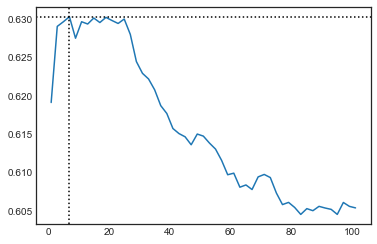

In [ ]:
# gráfico de todos as F1 obtidas no GridSearch

accs = grid_KNN.cv_results_['mean_test_score']
melhor = grid_KNN.best_params_.get('n_neighbors')

plt.plot(KVizinhos, accs)
plt.axhline(max(accs), color = 'black', linestyle = 'dotted')
plt.axvline(melhor, color = 'black', linestyle = 'dotted')
plt.show()

Regressão Logistica

In [ ]:
parametros_Reg = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}

modeloReg = LogisticRegression(random_state=0)
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

grid_Reg = GridSearchCV(modeloReg, param_grid = parametros_Reg,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 1, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS

grid_Reg.fit(XTreino, YTreino)
melhor_Reg = grid_Reg.best_estimator_

print('\F1-Score: {:.4f}'.format(grid_Reg.best_score_))
#print('\Precisão: {:.4f}'.format(grid_Reg.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Reg.best_params_))

Fitting 100 folds for each of 100 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1629 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 2651 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 3985 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 7834 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  5.2min finished


\F1-Score: 0.6640
Melhores parâmetros: {'C': 0.05963623316594643, 'penalty': 'l2'}



C:\Users\leand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#grid_Reg.best_estimator_#traz o melhor parâmetro encontrado
#grid_Reg.cv_results_ #Traz todos os resultado alcançados
grid_Reg.cv_results_['mean_test_score']#traz as médias dos knn(1,3,5,7,...,49)

array([       nan, 0.60643833,        nan, 0.60831554,        nan,
       0.61092267,        nan, 0.61769904,        nan, 0.62601349,
              nan, 0.63252447,        nan, 0.64157234,        nan,
       0.6480171 ,        nan, 0.65413291,        nan, 0.65869747,
              nan, 0.66060605,        nan, 0.66240682,        nan,
       0.66382525,        nan, 0.66393627,        nan, 0.66347993,
              nan, 0.66326201,        nan, 0.66399729,        nan,
       0.66400082,        nan, 0.66368598,        nan, 0.66368528,
              nan, 0.66365197,        nan, 0.66370055,        nan,
       0.66332969,        nan, 0.66374787,        nan, 0.66323249,
              nan, 0.66301225,        nan, 0.66291025,        nan,
       0.66301532,        nan, 0.6629643 ,        nan, 0.66319767,
              nan, 0.66306252,        nan, 0.66301156,        nan,
       0.66320404,        nan, 0.66296734,        nan, 0.66290344,
              nan, 0.66301833,        nan, 0.6628714 ,        

In [ ]:
melhor_Reg

LogisticRegression(C=0.05963623316594643, random_state=0)

Gradient

In [ ]:

parametros_Grad = { 'n_estimators' : np.arange(20,101,10), 
                    'learning_rate' : np.arange(0.01,0.32,0.03),
                    'max_depth': np.arange(3,10,3)
                 }

modeloGrad = GradientBoostingClassifier()
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

grid_Grad = GridSearchCV(modeloGrad, param_grid = parametros_Grad,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS

grid_Grad.fit(XTreino, YTreino)
melhor_Grad = grid_Grad.best_estimator_

print('\F1-Score: {:.4f}'.format(grid_Grad.best_score_))
#print('\Precisão: {:.4f}'.format(grid_MLP.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))


Fitting 20 folds for each of 297 candidates, totalling 5940 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

\F1-Score: 0.6956
Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 20}



In [ ]:
#grid_MLP.best_estimator_#traz o melhor parâmetro encontrado
#grid_MLP.cv_results_ #Traz todos os resultado alcançados
grid_Grad.cv_results_['mean_test_score']#traz as médias dos knn(1,3,5,7,...,49)

array([0.69562427, 0.69562427, 0.69287885, 0.67736126, 0.67072106,
       0.68721864, 0.69045011, 0.69041853, 0.68795432, 0.67753093,
       0.67248837, 0.6696074 , 0.66917902, 0.66774673, 0.66538719,
       0.66548081, 0.66620015, 0.66717867, 0.6557053 , 0.65555283,
       0.65616947, 0.65776597, 0.65614075, 0.65735266, 0.65813334,
       0.65758534, 0.65827352, 0.68859885, 0.68063693, 0.6789408 ,
       0.67890017, 0.67799131, 0.67781771, 0.67978312, 0.68128704,
       0.68138856, 0.66591955, 0.67370383, 0.67602923, 0.67672916,
       0.67742652, 0.6789115 , 0.68032592, 0.68016041, 0.68166428,
       0.65675872, 0.66064984, 0.66420424, 0.66944371, 0.67300354,
       0.6739702 , 0.68129634, 0.67536583, 0.68018573, 0.67823273,
       0.67982128, 0.68031181, 0.68112177, 0.68283901, 0.68244591,
       0.68220843, 0.68337423, 0.68307062, 0.6726861 , 0.67830594,
       0.68461668, 0.6817144 , 0.68146247, 0.68313848, 0.6814943 ,
       0.68235508, 0.6816957 , 0.65887673, 0.67031478, 0.67380

In [ ]:
melhor_Grad

GradientBoostingClassifier(learning_rate=0.01, n_estimators=20)

SVC

In [ ]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}

                  
modeloSVC = SVC()
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

grid_SVC = GridSearchCV(modeloSVC, param_grid = param_grid,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS

grid_SVC.fit(XTreino, YTreino)
melhor_SVC = grid_SVC.best_estimator_

print('\F1-Score: {:.4f}'.format(grid_SVC.best_score_))
#print('\Precisão: {:.4f}'.format(grid_SVC.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_SVC.best_params_))
 


Fitting 20 folds for each of 12 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

\F1-Score: 0.6765
Melhores parâmetros: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}



In [ ]:
#grid_Bag.best_estimator_#traz o melhor parâmetro encontrado
#grid_Bag.cv_results_ #Traz todos os resultado alcançados
grid_SVC.cv_results_['mean_test_score']#traz as médias dos knn(1,3,5,7,...,49)

array([0.6733101 , 0.67296166, 0.6444247 , 0.54939266, 0.6728288 ,
       0.67592233, 0.66640211, 0.67383062, 0.66934921, 0.6487315 ,
       0.6696405 , 0.67650659])

In [ ]:
melhor_SVC

SVC(C=10, gamma=0.001)

In [ ]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['sigmoid']}

                  
modeloSVC = SVC()
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

grid_SVC = GridSearchCV(modeloSVC, param_grid = param_grid,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS

grid_SVC.fit(XTreino, YTreino)
melhor_SVC = grid_SVC.best_estimator_

print('\F1-Score: {:.4f}'.format(grid_SVC.best_score_))
#print('\Precisão: {:.4f}'.format(grid_SVC.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_SVC.best_params_))

grid_SVC.cv_results_['mean_test_score']

Fitting 20 folds for each of 12 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

\F1-Score: 0.6733
Melhores parâmetros: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}



array([0.6733101 , 0.6733101 , 0.51852704, 0.58916502, 0.6733101 ,
       0.57323969, 0.51678819, 0.53187555, 0.6733101 , 0.55706303,
       0.51687129, 0.53025125])

In [ ]:
melhor_SVC

SVC(C=0.1, gamma=1, kernel='sigmoid')

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}

                  
modeloSVC = SVC()
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

grid_SVC = GridSearchCV(modeloSVC, param_grid = param_grid,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = -1)#n_jobs = usa VARIOS CLUSTERS

grid_SVC.fit(XTreino, YTreino)
melhor_SVC = grid_SVC.best_estimator_

print('\F1-Score: {:.4f}'.format(grid_SVC.best_score_))
#print('\Precisão: {:.4f}'.format(grid_SVC.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_SVC.best_params_))

grid_SVC.cv_results_['mean_test_score']

Fitting 20 folds for each of 16 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 19

\F1-Score: 0.6770
Melhores parâmetros: {'C': 10, 'gamma': 1, 'kernel': 'linear'}



array([0.67610753, 0.67610753, 0.67610753, 0.67610753, 0.67678929,
       0.67678929, 0.67678929, 0.67678929, 0.67701595, 0.67701595,
       0.67701595, 0.67701595, 0.67614827, 0.67614827, 0.67614827,
       0.67614827])

In [ ]:
melhor_SVC

SVC(C=10, gamma=1, kernel='linear')

---

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
modelo_Grad = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 20)
mol_Grad = cross_validate(modelo_Grad, XTreino, YTreino, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 10, n_jobs = -1)

acc = mol_Grad['test_accuracy'].mean()
pre = mol_Grad['test_precision'].mean()
rec = mol_Grad['test_recall'].mean()
f1s = mol_Grad['test_f1'].mean()

j = 'Grad'

print(f1s)
print(pre)
print(rec)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.7s


0.6957147149231436
0.5731905555124265
0.8850371330774816


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.5s finished


Combinação por Votos

In [ ]:
modelo_Grad = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 20)
modelo_Randon = RandomForestClassifier()

modelo_SVM_Linear = SVC(kernel = 'linear', C = 10, gamma = 1)
modelo_SVM_RBF = SVC(kernel = 'rbf')
modelo_SVM_POLY = SVC(kernel = 'poly')

modelo_Ada = AdaBoostClassifier()

In [ ]:
 #precisa ser alimentada com uma LISTA DE MODELOS

#modelos definido na tabela de testes
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1)

#LISTA DE MODELOS - Nome do modelo + instancia do modelo
modelos = [('Gradiente', modelo_Grad), ('Árvore', modelo_Randon), ('SVM RBF', modelo_SVM_RBF),('Modelo Ada', modelo_Ada) , ('SVM Linear', modelo_SVM_Linear)]# ('Modelo Ada', modelo_Ada)]#, ('SVM POLY', modelo_SVM_POLY ) #SVM n tem
#modelo de votos soft implementado
modelo = VotingClassifier(modelos, voting = 'hard')

#medidas apuradas do modelo selecionado, vendo apenas a métrica F1-Score com o método kfold repetido
medidas = cross_validate(modelo, XTreino, YTreino, cv = validacao, scoring = 'f1', verbose = 10, n_jobs = -1)
medidas['test_score'].mean()#resultado para cada iteração e para cada repetição

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  3.7min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  4.7min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.1min finished


0.6950290484728034

In [ ]:
hard
0.6875128310917977
0.6879245054037814

Linear 
0.6889695169366093
0.6883924200020168
ADA 
0.6892501305303662
0.6924120583658716

soft
0.6839246138695521

#A Submissão

In [ ]:

modelos_sub = [('Gradiente', modelo_Grad), ('Árvore', modelo_Randon), ('SVM RBF', modelo_SVM_RBF),('Modelo Ada', modelo_Ada) , ('SVM Linear', modelo_SVM_Linear)]
modelo_sub = VotingClassifier(modelos_sub, voting = 'hard')

modelo_sub.fit(XTreino, YTreino)
pred_sub = modelo_sub.predict(XTeste)

In [ ]:

predicao_final = pd.DataFrame()
predicao_final['term_deposit'] = pred_sub
#Escrevendo CSV
predicao_final.to_csv('D:\Submissão.csv', index = False)

In [ ]:
predicao_final.describe()

,term_deposit
count,1422.000000
mean,0.580872
std,0.493590
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
predicao_final.value_counts()

term_deposit
1               826
0               596
dtype: int64

In [ ]:
resultados3 = pd.DataFrame()

https://forms.gle/LgycvedPBZtAHHux9